In [34]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier

In [35]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


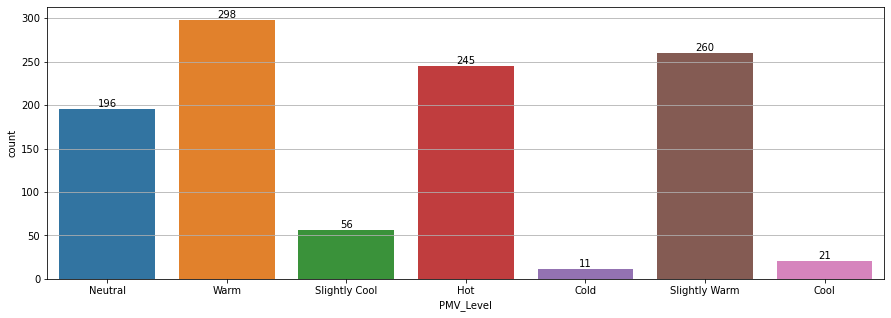

In [36]:
# Adding Values to Seaborn Count Plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='PMV_Level', )

for label in ax.containers:
    ax.bar_label(label)
    
plt.show()


In [37]:
df['PMV_Level'].value_counts()

Warm             298
Slightly Warm    260
Hot              245
Neutral          196
Slightly Cool     56
Cool              21
Cold              11
Name: PMV_Level, dtype: int64

In [38]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

Male      663
Female    424
Name: Gender, dtype: int64
18-25    1009
26-30      78
Name: Age, dtype: int64
3    565
2    423
4     99
Name: Study_Level, dtype: int64
601     52
902     48
607     47
801     44
501     44
620     44
621     43
707     42
612     41
608     40
603     40
903     38
504     38
904     37
804     37
924     35
520     34
901     34
1003    34
604     33
803     30
905     29
1004    29
913     29
802     28
805     27
823     26
907     24
908     21
909     21
1002    18
Name: Room_No, dtype: int64
N-W    459
S-E    445
S-W    125
N-E     58
Name: Room_Orientation, dtype: int64
24    202
26    182
25    165
23    134
21    112
18     74
28     44
15     42
16     41
22     37
13     33
10     21
Name: No_Lights, dtype: int64
12    221
9     187
14    162
10    133
13    132
5      66
15     44
8      44
11     41
6      29
16     28
Name: No_Fans, dtype: int64
3    573
5    288
4    147
2     79
Name: No_Windows, dtype: int64
2    789
1    298
Name: No_Do

<AxesSubplot:>

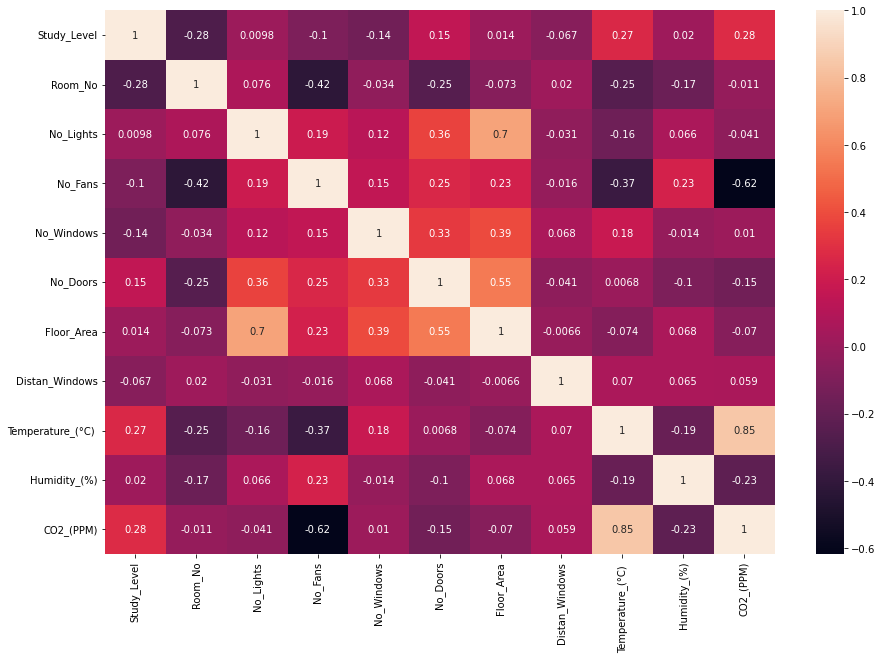

In [39]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [40]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [41]:
df.head()  

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [42]:
#Filter any variables with low variance (close to zero) to avoid overfitting
df.var()

Gender                  0.238133
Age                     0.066669
Study_Level             0.391737
Room_No             25085.079254
Room_Orientation        0.711123
No_Lights              15.831979
No_Fans                 7.346655
No_Windows              0.917549
No_Doors                0.199175
Floor_Area            363.316001
Distan_Windows          1.924690
Temperature_(°C)        2.851991
Humidity_(%)           29.145839
CO2_(PPM)              15.096677
PMV_Level               3.561772
Lighting_Level          3.038354
dtype: float64

In [43]:
inputs = df.drop(['PMV_Level',], axis='columns')

In [44]:
target = df['PMV_Level']

In [45]:
inputs

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [46]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [47]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [49]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

In [50]:
# Define SMOTE-Tomek Links
resample=SMOTEENN(random_state =42)
X, y = resample.fit_resample(X, y)

In [51]:
y.value_counts()

4    236
6    134
2     96
3     81
0     37
5     21
1     12
Name: PMV_Level, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# defining parameters
param_grid = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 21))), 
    "min_samples_split":[2, 3, 4, 6, 8], 
    "min_samples_leaf":list(range(1, 10)), 
}
# training model on the define params with GridSearchCV
clf_tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf_tree, param_grid,scoring="accuracy",
                       n_jobs=-1,verbose=1, cv=3,)

tree_cv.fit(X_train, y_train)
predictions = tree_cv.predict(X_test)
optimal_params = tree_cv.best_params_
print(f"\nOptimal paramters: ({optimal_params})")

print("\n====BEST MODEL SCORE====")
print('Best model score: ', tree_cv.best_score_)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits

Optimal paramters: ({'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})

====BEST MODEL SCORE====
Best model score:  0.5845410628019323


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
rfc = DecisionTreeClassifier(criterion='gini',max_depth=16,max_features='sqrt', min_samples_split= 2,min_samples_leaf= 1,splitter='best')
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

Accuracy score: 0.9274193548387096


In [54]:
rfc.score(X_train, y_train)

1.0

In [55]:
y_predict = rfc.predict(X_test)

In [56]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.26
RMSE: 0.51


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm)


Accuracy: 0.9274193548387096
Confusion matrix:
[[ 6  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 19  0  5  0  0]
 [ 1  0  0 14  0  0  0]
 [ 0  0  0  2 43  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0 27]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.00      0.00         1
           2       0.95      0.79      0.86        24
           3       0.88      0.93      0.90        15
           4       0.90      0.96      0.92        45
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        27

    accuracy                           0.93       124
   macro avg       0.94      0.81      0.80       124
weighted avg       0.93      0.93      0.92       124



In [61]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [62]:
y_predict = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

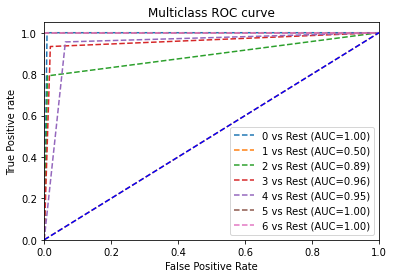

In [63]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [30]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfc.predict_proba(X_test))
logloss

9.39420378404301

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

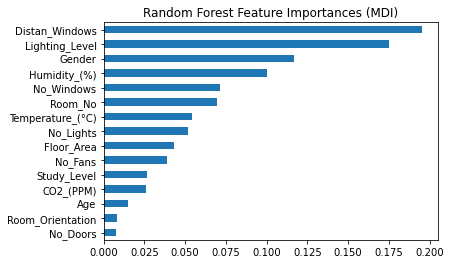

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')

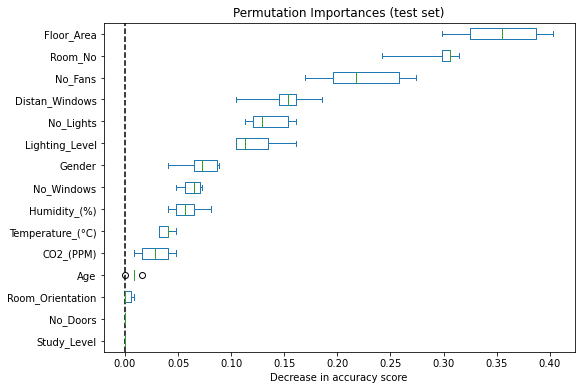

<Figure size 1800x1080 with 0 Axes>

In [64]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

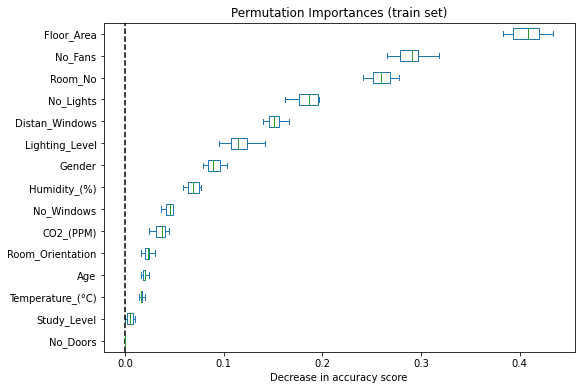

<Figure size 1800x1080 with 0 Axes>

In [65]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [66]:
import numpy as np
import pandas as pd

In [67]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

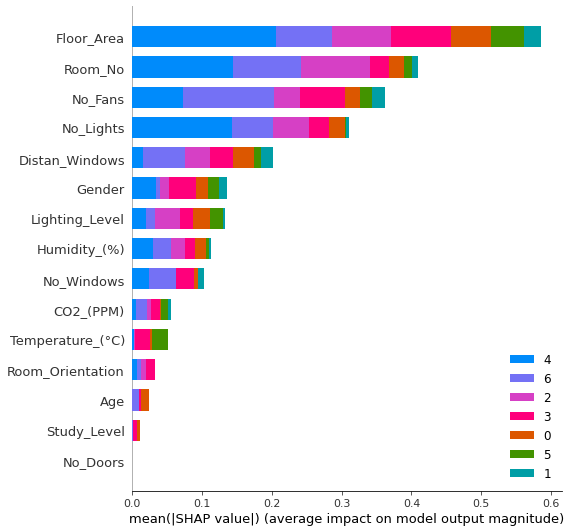

In [68]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

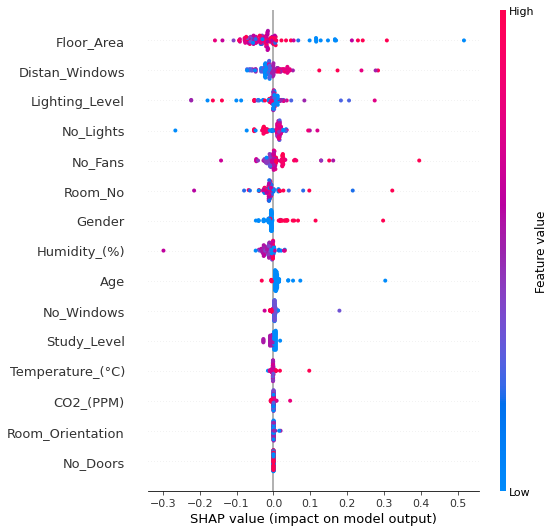

In [69]:
shap.summary_plot(shap_values[0], X_test)

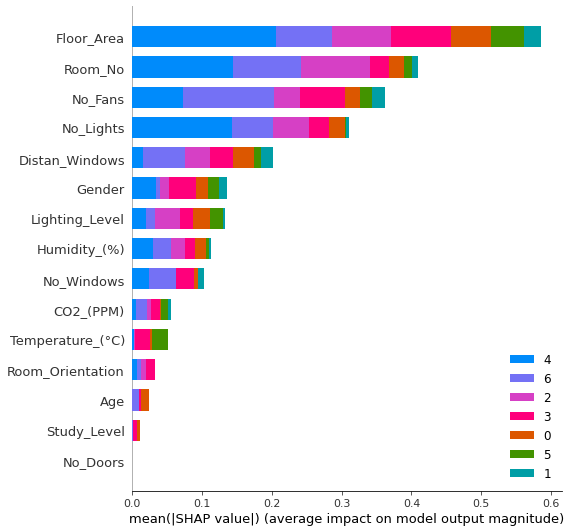

In [70]:
shap.summary_plot(shap_values, X_train, class_names=rfc.classes_ )

In [71]:
#importing random forest classifier and recursive feature elemenation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    rfc = RFE(DecisionTreeClassifier( random_state=42), n_features_to_select= i)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(y_test, y_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.6209677419354839

Number of Selected features:  2
accuracy score: 0.7661290322580645

Number of Selected features:  3
accuracy score: 0.8629032258064516

Number of Selected features:  4
accuracy score: 0.8870967741935484

Number of Selected features:  5
accuracy score: 0.9435483870967742

Number of Selected features:  6
accuracy score: 0.9516129032258065

Number of Selected features:  7
accuracy score: 0.9596774193548387

Number of Selected features:  8
accuracy score: 0.967741935483871

Number of Selected features:  9
accuracy score: 0.9596774193548387

Number of Selected features:  10
accuracy score: 0.9596774193548387

Number of Selected features:  11
accuracy score: 0.9596774193548387

Number of Selected features:  12
accuracy score: 0.9596774193548387

Number of Selected features:  13
accuracy score: 0.9596774193548387

Number of Selected features:  14
accuracy score: 0.9596774193548387



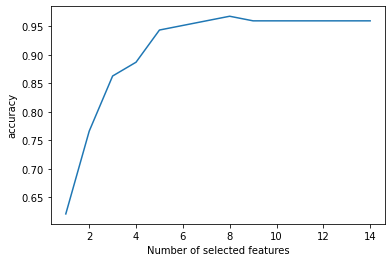

In [72]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 15),
    scores,
)
plt.show()

In [73]:
rfc.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [74]:
features = X_train.columns[rfc.get_support()]
features

Index(['Gender', 'Study_Level', 'Room_No', 'Room_Orientation', 'No_Lights',
       'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows',
       'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level'],
      dtype='object')

In [75]:
excluded_feature = list(set(X_train.columns) - set(features))
print(excluded_feature)

['Age']


In [76]:
#drop features from X
X = X.drop(['Room_Orientation'], axis=1)

In [77]:
#updating train & test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = DecisionTreeClassifier()
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X_train,y_train)

print(f"Optimal number of features: {rfe.n_features_}")

Optimal number of features: 8


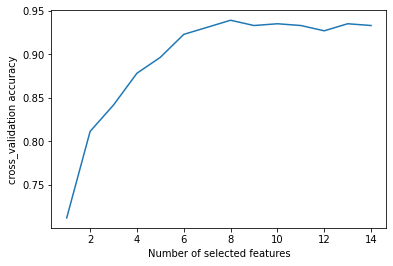

In [79]:
n_scores = len(rfe.cv_results_)
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("cross_validation accuracy")
plt.plot(
    range (1,len (rfe.cv_results_["mean_test_score"])+1),
    rfe.cv_results_["mean_test_score"],)

plt.show()

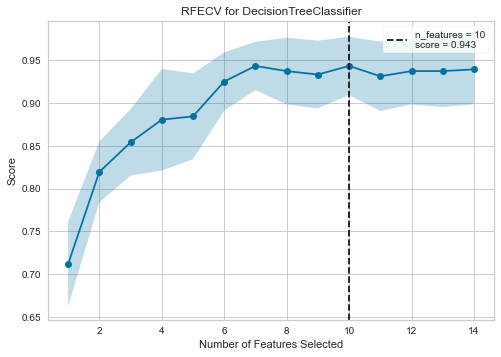

<AxesSubplot:title={'center':'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [80]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear DT classifier
visualizer = RFECV(estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,)

visualizer.fit(X_train,y_train)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

In [81]:
for depth in [10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
    rfc = DecisionTreeClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    print(f'Depth: {depth}. Score: {rfc.score(X_train, y_train)}')

Depth: 10. Score: 1.0
Depth: 11. Score: 1.0
Depth: 12. Score: 1.0
Depth: 13. Score: 1.0
Depth: 14. Score: 1.0
Depth: 15. Score: 1.0
Depth: 16. Score: 1.0
Depth: 17. Score: 1.0
Depth: 18. Score: 1.0
Depth: 19. Score: 1.0
Depth: 20. Score: 1.0
Depth: 21. Score: 1.0
Depth: 22. Score: 1.0
Depth: 23. Score: 1.0


In [ ]:
for criterion in ['gini', 'entropy', 'log_loss',]:
    rfc = DecisionTreeClassifier(criterion=criterion)
    rfc.fit(X_train, y_train)
    print(f'criterion: {criterion}. Score: {rfc.score(X_train, y_train)}')

In [ ]:
for min_samples_split in [2,3,4,5,]:
    rfc = DecisionTreeClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    print(f'min_samples_split: {min_samples_split}. Score: {rfc.score(X_train, y_train)}')

In [ ]:
for min_samples_leaf in [1,2,3,4,5,]:
    rfc = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    print(f'min_samples_leaf: {min_samples_leaf}. Score: {rfc.score(X_train, y_train)}')

In [ ]:
for max_features in ['sqrt','log2',]:
    rfc = DecisionTreeClassifier(max_features=max_features)
    rfc.fit(X_train, y_train)
    print(f'max_features: {max_features}. Score: {rfc.score(X_train, y_train)}')

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(rfc, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
import pandas as pd
from sklearn import tree
import dtreeviz
import graphviz
# DOT data

dot_data = tree.export_graphviz(rfc, out_file=None, 
                                feature_names=features,impurity=True,rounded=True, max_depth=21,  
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="pdf") 
graph

In [ ]:
graph.render('DT_PMV_Partial')